In [1]:
# 1. Importing needed packages and explain their uses in your code.

import numpy as np  # for numerical operations
import pandas as pd  # for data manipulation
import matplotlib.pyplot as plt  # for data visualization
from sklearn.svm import SVC  # for Support Vector Classifier
from sklearn.preprocessing import StandardScaler  # for feature scaling
from sklearn.model_selection import train_test_split  # for data splitting
import seaborn as sns # Seaborn is a library for making statistical graphics in Python.
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report  # for evaluation

In [2]:
# 2. Importing the selected dataset and visualizing the dataset contents.
data = pd.read_csv("Social_Network_Ads (1).csv")
data.head()  # display first few rows of the dataset

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
data.info()  # display dataset information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


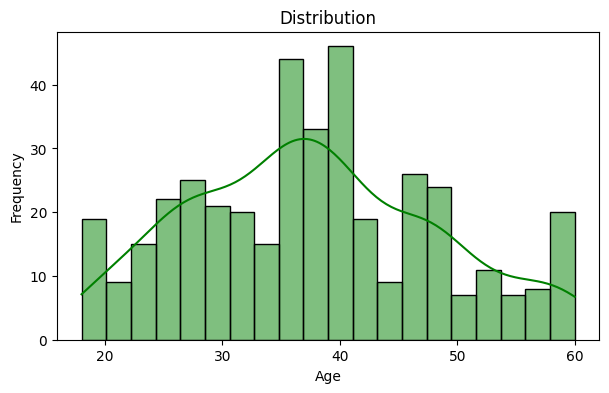

In [4]:
# Visualize age distribution
plt.figure(figsize=(7, 4))
sns.histplot(data['Age'], bins=20, kde=True, color='green')
plt.title('Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

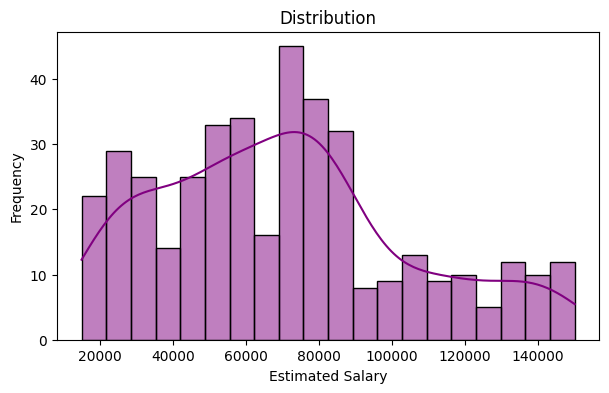

In [5]:
# Visualize estimated salary distribution
plt.figure(figsize=(7, 4))
sns.histplot(data['EstimatedSalary'], bins=20, kde=True, color='purple')
plt.title('Distribution')
plt.xlabel('Estimated Salary')
plt.ylabel('Frequency')
plt.show()


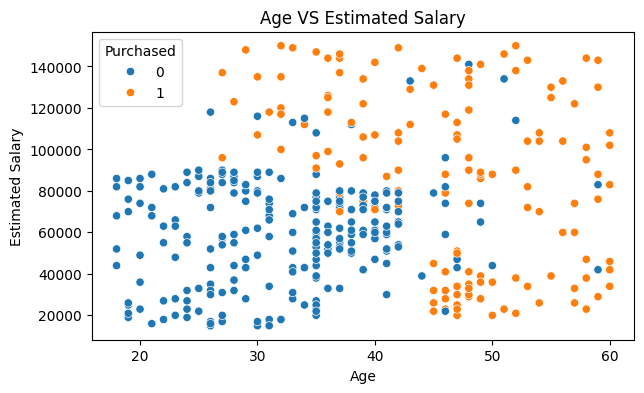

In [6]:
# Visualize the relationship between age, estimated salary, and the target variable (Purchased)
plt.figure(figsize=(7, 4))
sns.scatterplot(x='Age', y='EstimatedSalary', hue='Purchased', data=data)
plt.title('Age VS Estimated Salary')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend(title='Purchased')
plt.show()

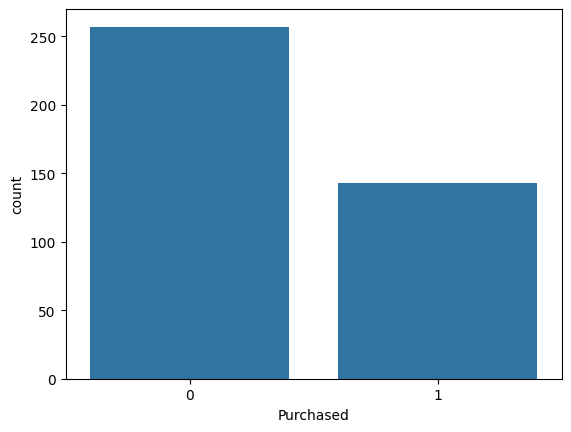

In [7]:
sns.countplot(x='Purchased', data=data)
plt.show()

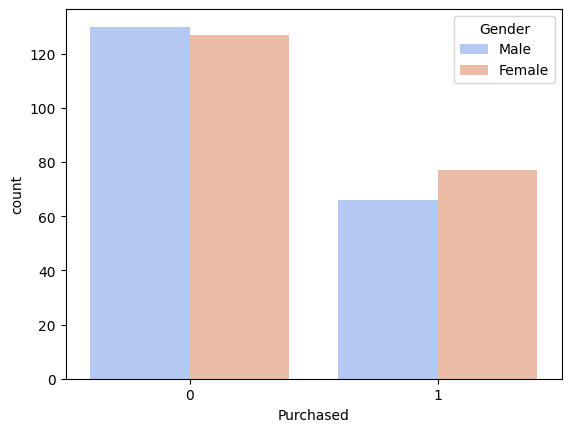

In [8]:
sns.countplot(x='Purchased', hue='Gender', data=data, palette='coolwarm')
plt.show()

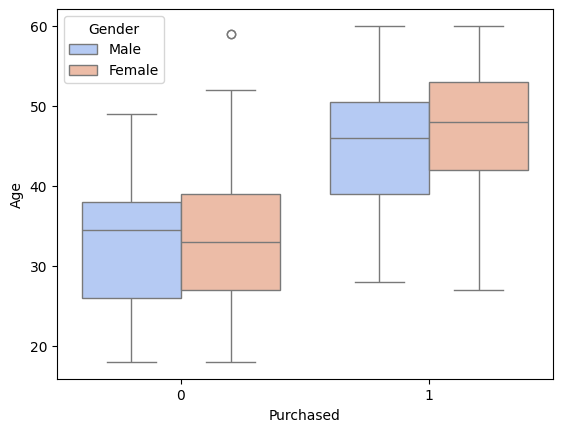

In [9]:
sns.boxplot(x='Purchased', hue='Gender', y='Age', data=data, palette='coolwarm')
plt.show()

In [10]:
data.head(3)

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0


In [11]:
from sklearn.preprocessing import LabelEncoder

if 'User ID' in data.columns:
    data.drop(columns=['User ID'], axis=1, inplace=True)

print(data.head(3) )

# Create a LabelEncoder object
label_encoder = LabelEncoder()
# Encode the 'Gender' column
data['Gender'] = label_encoder.fit_transform(data['Gender'])
print("")
print("")
print(data.head(3))

   Gender  Age  EstimatedSalary  Purchased
0    Male   19            19000          0
1    Male   35            20000          0
2  Female   26            43000          0


   Gender  Age  EstimatedSalary  Purchased
0       1   19            19000          0
1       1   35            20000          0
2       0   26            43000          0


In [12]:
#3 Split the dataset into features (X) and target variable (y)

X = data.drop('Purchased', axis=1)  # Features
y = data['Purchased']  # Target variable

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=30)

# Print the sizes of the resulting datasets
print("Training set size:", X_train.shape[0])
print("Test set size:", X_test.shape[0])

Training set size: 320
Test set size: 80


In [13]:
#4 Initialize the SVM classifier with default parameters

classifier = SVC()

classifier = SVC(kernel='linear', random_state=0)  # initialize SVM classifier

print("Default parameters of SVM classifier:")
print(classifier.get_params())

Default parameters of SVM classifier:
{'C': 1.0, 'break_ties': False, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'linear', 'max_iter': -1, 'probability': False, 'random_state': 0, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [14]:
#5 Train the SVM classifier on the training data

classifier.fit(X_train, y_train)


SVC(kernel='linear', random_state=0)

Accuracy: 0.825


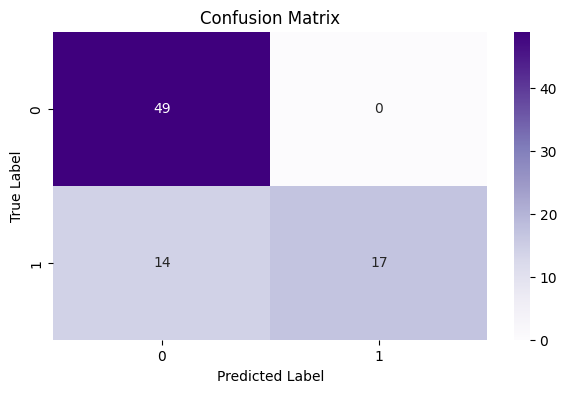

In [15]:
#6 Testing and evaluating the trained ML model(s)

# Make predictions on the test data
y_pred = classifier.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Create a confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(7, 4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Purples")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

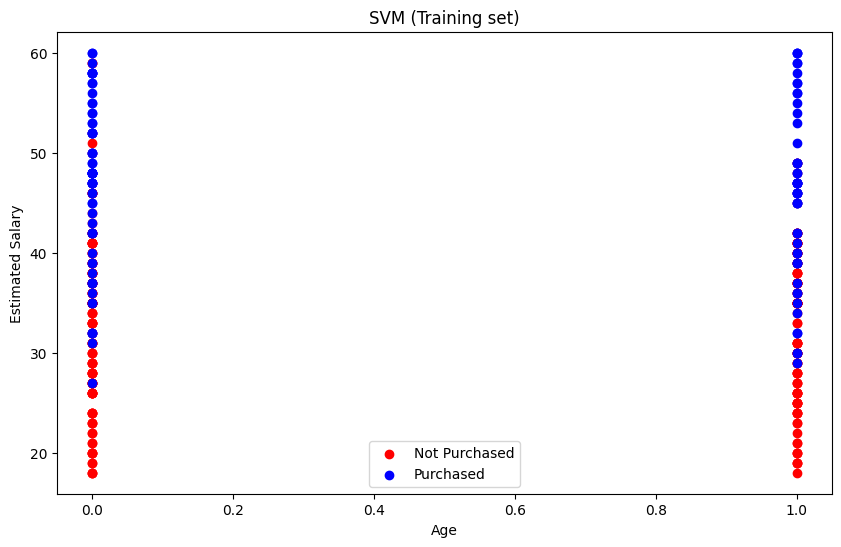

In [22]:
# Convert X_train to numpy array if it's a DataFrame
X_train_np = X_train.values if isinstance(X_train, pd.DataFrame) else X_train

# Visualizing the training set results
plt.figure(figsize=(10, 6))

# Use boolean indexing correctly with numpy arrays
plt.scatter(X_train_np[y_train == 0, 0], X_train_np[y_train == 0, 1], color='red', label='Not Purchased')
plt.scatter(X_train_np[y_train == 1, 0], X_train_np[y_train == 1, 1], color='blue', label='Purchased')

# Add title and labels
plt.title('SVM (Training set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

# Display the plot
plt.show()


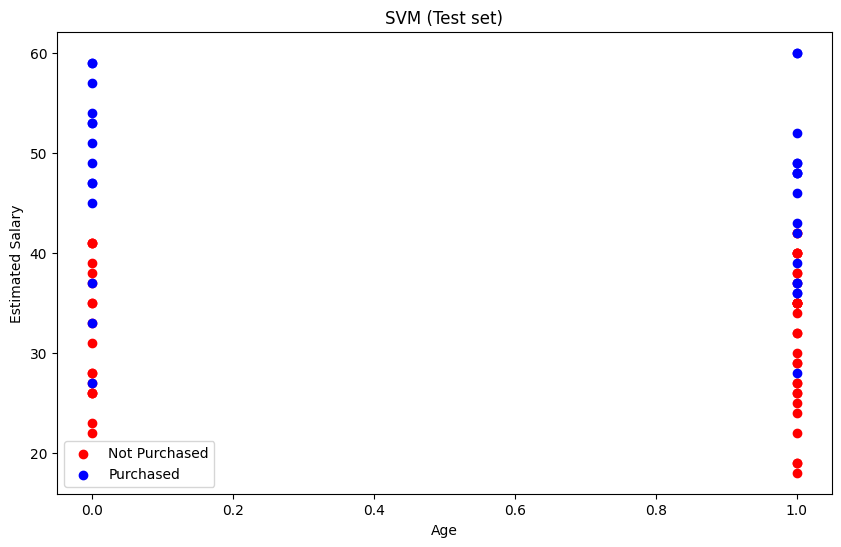

In [25]:
# Ensure X_test and y_test are numpy arrays
X_test = np.array(X_test)
y_test = np.array(y_test)

# Visualize the test set results
plt.figure(figsize=(10, 6))
plt.scatter(X_test[y_test == 0][:, 0], X_test[y_test == 0][:, 1], color='red', label='Not Purchased')
plt.scatter(X_test[y_test == 1][:, 0], X_test[y_test == 1][:, 1], color='blue', label='Purchased')
plt.title('SVM (Test set)')
plt.xlabel('Age')
plt.ylabel('Estimated Salary')
plt.legend()

plt.show()


In [32]:
# Evaluating the model

print(confusion_matrix(y_test, y_pred))  # confusion matrix
print(" ")
print(" ")
print(classification_report(y_test, y_pred))  # classification report

[[49  0]
 [14 17]]
 
 
              precision    recall  f1-score   support

           0       0.78      1.00      0.88        49
           1       1.00      0.55      0.71        31

    accuracy                           0.82        80
   macro avg       0.89      0.77      0.79        80
weighted avg       0.86      0.82      0.81        80

